In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings

<b> 1. Xử lý dữ liệu </b>

<b>Dataset về Youth Tobacco Survey</b>

In [4]:
df = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')

In [5]:
df.head()
df.shape

(10600, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [7]:
df.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [8]:
df.nunique()

YEAR                            19
LocationAbbr                    50
LocationDesc                    50
TopicType                        1
TopicDesc                        3
MeasureDesc                      4
DataSource                       2
Response                         3
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     750
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             111
Low_Confidence_Limit           688
High_Confidence_Limit          844
Sample_Size                   2625
Gender                           3
Race                             1
Age                              1
Education                        2
GeoLocation                     50
TopicTypeId                      1
TopicId                          3
MeasureId                        4
StratificationID1                3
StratificationID2                1
StratificationID3                1
StratificationID4   

In [9]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [10]:
# Xử lý các giá trị NaN trong các cột: 'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
# 'High_Confidence_Limit', 'sample_size'
df.dropna(subset=['Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
                   'High_Confidence_Limit', 'Sample_Size'], inplace=True)
df['Response'] = df['Response'].fillna('Current')

In [11]:
df.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                          0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Footnote_Symbol    10080
Data_Value_Footnote           10080
Data_Value_Std_Err                0
Low_Confidence_Limit              0
High_Confidence_Limit             0
Sample_Size                       0
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [12]:
df = df[['YEAR', 'LocationDesc',
       'MeasureDesc', 'Response',  'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Education', 'MeasureId',
       'StratificationID1', 'StratificationID4', 'SubMeasureID', 'DisplayOrder']]
df.columns = df.columns.str.lower()
df.rename(columns={'stratificationid4':'edu_id', 'stratificationid1':'gender_id'},inplace = True)
print(df.columns)
df['measureid'].nunique

Index(['year', 'locationdesc', 'measuredesc', 'response', 'data_value',
       'data_value_std_err', 'low_confidence_limit', 'high_confidence_limit',
       'sample_size', 'gender', 'education', 'measureid', 'gender_id',
       'edu_id', 'submeasureid', 'displayorder'],
      dtype='object')


<bound method IndexOpsMixin.nunique of 0        166SSA
1        166SSA
2        169USS
3        166SSA
4        169USS
          ...  
10594    170CES
10595    169USS
10596    166SSA
10598    166SSA
10599    166SSA
Name: measureid, Length: 10080, dtype: object>

<b>Dataset về Thuế Thuốc Lá </b>

In [14]:
tax_data = pd.read_csv('The_Tax_Burden_on_Tobacco__1970-2019_20240321.csv')
tax_data.head(10)

,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,SubMeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId,SubMeasureID,SubMeasureIdDisplayOrder
0,IA,Iowa,1985,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.180,$,Dollars,"(42.469400913, -93.816490556)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
1,MA,Massachusetts,1972,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.160,$,Dollars,"(42.27687047, -72.082690675)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
2,ID,Idaho,2003,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.570,$,Dollars,"(43.682630005, -114.363730042)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
3,UT,Utah,2002,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.695,$,Dollars,"(39.360700171, -111.587130635)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
4,ME,Maine,2008,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,2.000,$,Dollars,"(45.254228894001, -68.985031336)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
5,UT,Utah,1976,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.080,$,Dollars,"(39.360700171, -111.587130635)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
6,AL,Alabama,2008,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,3.752,$,Dollars,"(32.840571122, -86.631860762)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
7,OH,Ohio,1977,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,0.539,$,Dollars,"(40.060210141, -82.404260056)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1
8,NV,Nevada,1978,OW,The Tax Burden on Tobacco,Cigarette Sales,State Tax per pack,0.100,$,Dollars,"(39.49324039, -117.071840564)","Table 7- Orzechowski and Walker, Tax Burden on...",POL,450POL,450CGS,451CGS,6
9,VT,Vermont,2007,OW,The Tax Burden on Tobacco,Cigarette Sales,Average Cost per pack,5.095,$,Dollars,"(43.625381239, -72.517640791)","Table 13- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,455CGS,1


In [15]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LocationAbbr              15300 non-null  object 
 1   LocationDesc              15300 non-null  object 
 2   Year                      15300 non-null  int64  
 3   Datasource                15300 non-null  object 
 4   TopicDesc                 15300 non-null  object 
 5   MeasureDesc               15300 non-null  object 
 6   SubMeasureDesc            15300 non-null  object 
 7   Data_Value                15300 non-null  float64
 8   Data_Value_Unit           12750 non-null  object 
 9   Data_Value_Type           15300 non-null  object 
 10  GeoLocation               15300 non-null  object 
 11  Source                    15300 non-null  object 
 12  TopicTypeId               15300 non-null  object 
 13  TopicId                   15300 non-null  object 
 14  Measur

In [16]:
tax_data.isna().sum()

LocationAbbr                   0
LocationDesc                   0
Year                           0
Datasource                     0
TopicDesc                      0
MeasureDesc                    0
SubMeasureDesc                 0
Data_Value                     0
Data_Value_Unit             2550
Data_Value_Type                0
GeoLocation                    0
Source                         0
TopicTypeId                    0
TopicId                        0
MeasureId                      0
SubMeasureID                   0
SubMeasureIdDisplayOrder       0
dtype: int64

<b> 2. Trực quan hóa dữ liệu </b>

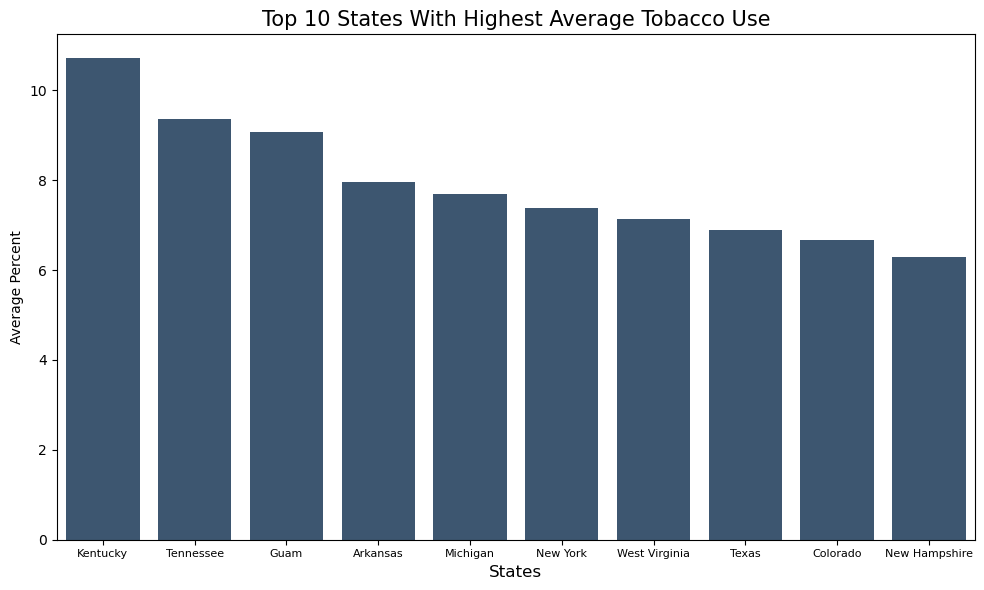

In [18]:
'''
Lấy ra danh sách top 10 bang có tỷ lệ hút thuốc nhiều nhất
'''
result = (df.loc[(df['edu_id'].isin(['1EDU','2EDU']))&
        (df['measureid'] == '166SSA')&
        (df["response"] == "Frequent")]
    .groupby("locationdesc", as_index=False)
    .agg(mean_smoke_percent=('data_value', "mean"))
    .sort_values("mean_smoke_percent", ascending=False)
    .head(10))
plt.figure(figsize=(10, 6))
sns.barplot(
    data=result,
    x="locationdesc",
    y="mean_smoke_percent",
    color='#345678'
)
plt.title("Top 10 States With Highest Average Tobacco Use", fontsize=15)
plt.xlabel("States", fontsize=12)
plt.ylabel("Average Percent", fontsize=10)
plt.xticks(ha="center", fontsize = 8)  
plt.tight_layout()
plt.show()

   gender_id edu_id  year  mean_tried_pct
0       2GEN   1EDU  1999       46.427273
1       2GEN   1EDU  2000       39.885185
2       2GEN   1EDU  2001       32.718182
3       2GEN   1EDU  2002       33.713043
4       2GEN   1EDU  2003       26.775000
..       ...    ...   ...             ...
71      3GEN   2EDU  2013       35.061538
72      3GEN   2EDU  2014       30.585714
73      3GEN   2EDU  2015       29.950000
74      3GEN   2EDU  2016       28.325000
75      3GEN   2EDU  2017       25.915385

[76 rows x 4 columns]


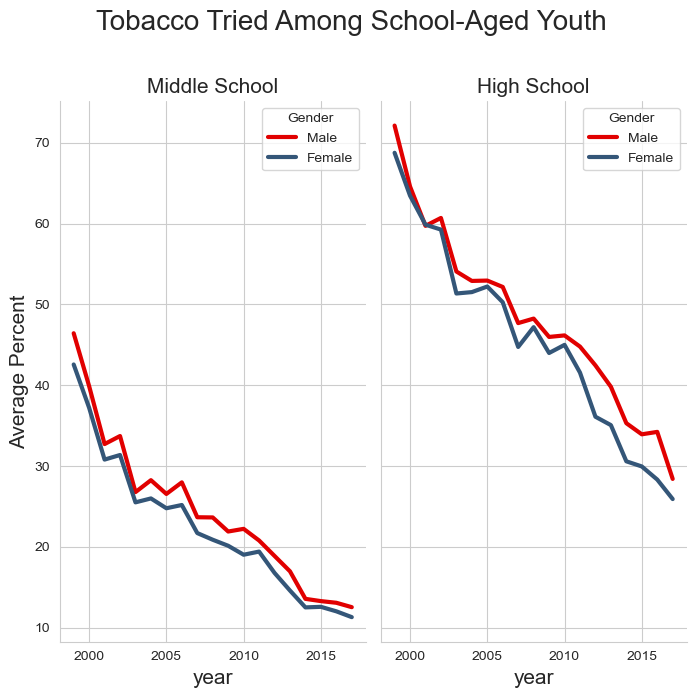

In [19]:
filtered_df = (
    df.loc[
        (df['edu_id'].isin(['1EDU', '2EDU'])) &
        (df['measureid'] == '166SSA') &
        (df['response'] == 'Ever') &
        (df['gender_id'].isin(['2GEN', '3GEN']))&
        (df['year'] >= 1999) & (df['year'] <= 2017)
    ]
    .groupby(['gender_id', 'edu_id', 'year'], as_index=False)
    .agg(
        mean_tried_pct=('data_value', 'mean')
    )
)
print(filtered_df)
sns.set_style("whitegrid")
titles = ["Middle School", "High School"] 
color_palette = {"2GEN": "#e10000", "3GEN": "#345678"}  
g = sns.FacetGrid(data=filtered_df, col="edu_id", sharey=True, sharex=True, height=7, aspect=0.5)
g.map_dataframe(sns.lineplot, x='year', y='mean_tried_pct', hue='gender_id', palette=color_palette, linewidth=3)
g.set_axis_labels("year", "Average Percent",fontsize=15)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Tobacco Tried Among School-Aged Youth", fontsize=20)
for ax in g.axes.flat:
    ax.legend(fontsize=7)
    ax.tick_params(axis='x',labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xticks(range(2000, 2018, 5))  
    ax.set_xticklabels(range(2000, 2018, 5)) 
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title, fontsize=15)
legend_labels = {"2GEN": "Male", "3GEN": "Female"}

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    updated_labels = [legend_labels[label] if label in legend_labels else label for label in labels]
    ax.legend(handles, updated_labels, title="Gender", fontsize=10)


     locationdesc  year  451CGS  455CGS
0         Alabama  1970    0.12    0.43
1         Alabama  1971    0.12    0.42
2         Alabama  1972    0.12    0.42
3         Alabama  1973    0.12    0.43
4         Alabama  1974    0.12    0.47
...           ...   ...     ...     ...
2545      Wyoming  2015    0.60    5.17
2546      Wyoming  2016    0.60    5.26
2547      Wyoming  2017    0.60    5.33
2548      Wyoming  2018    0.60    5.46
2549      Wyoming  2019    0.60    5.68

[2550 rows x 4 columns]
     year cost_category  cost
0    1970      Max_Cost  0.46
1    1971      Max_Cost  0.51
2    1972      Max_Cost  0.51
3    1973      Max_Cost  0.52
4    1974      Max_Cost  0.55
..    ...           ...   ...
145  2015      Min_Cost  4.53
146  2016      Min_Cost  4.62
147  2017      Min_Cost  4.82
148  2018      Min_Cost  4.96
149  2019      Min_Cost  5.21

[150 rows x 3 columns]


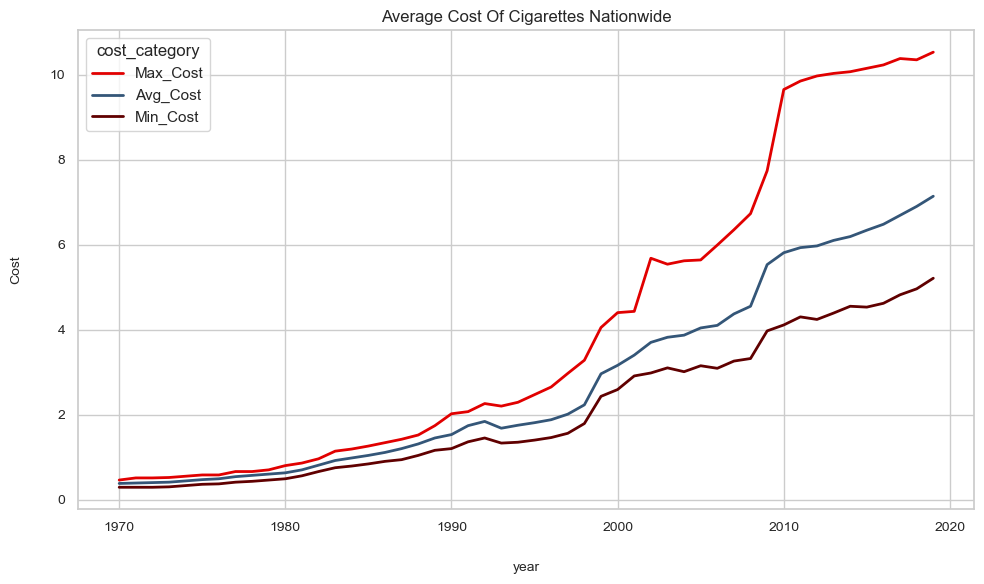

In [20]:
tax_data.columns = tax_data.columns.str.lower()
filtered_tax=(tax_data
    .assign(cost=round(tax_data['data_value'],2))
    .loc[:, ["year", "locationdesc", "submeasuredesc", "submeasureid", "cost"]] 
    .dropna(subset=["cost"]) 
    .loc[lambda df: df["submeasureid"].isin(["451CGS", "455CGS"])] 
    .sort_values(by=["locationdesc", "year", "cost"], ascending=[True, False, False])  
    .pivot(index=["locationdesc", "year"], columns="submeasureid", values="cost") 
    .reset_index()
)
filtered_tax.columns.name = None
print(filtered_tax)
cost_per_pack = (
    filtered_tax
    .loc[:,['year', 'locationdesc', '455CGS']] 
    .dropna(subset=['455CGS'])  
    .groupby('year', as_index=False)  
    .agg(
        Max_Cost=('455CGS', 'max'),  
        Avg_Cost=('455CGS', 'mean'),  
        Min_Cost=('455CGS', 'min')  
    )
    .round(2) 
    .melt(id_vars=['year'], var_name='cost_category', value_name='cost') 
)
print(cost_per_pack)

sns.set(style="whitegrid", palette=["#e10000", "#345678", "#600000"])
plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_per_pack, x='year', y='cost', hue='cost_category', linewidth=2)
plt.title('Average Cost Of Cigarettes Nationwide', fontsize=12)
plt.xlabel('year', fontsize=10, labelpad=20)
plt.ylabel('Cost', fontsize=10, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

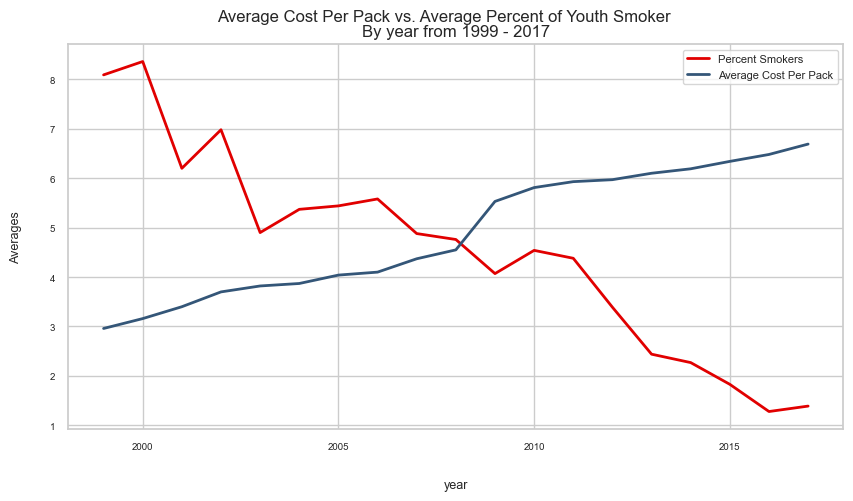

In [21]:
warnings.filterwarnings('ignore', category=UserWarning) 
warnings.filterwarnings('ignore', category=DeprecationWarning)
selected_yts = (df[df['gender_id'] == '1GEN']
                        [df['response'] == 'Frequent']
                        [df['measureid'] == '166SSA'])
selected_yts = (selected_yts[['year', 'locationdesc', 'measureid', 'data_value', 'gender_id']]
                            .groupby(['year', 'measureid'],group_keys=False)
                            .apply(lambda x: x.sort_values(by='year'))
                            .reset_index(drop=True))
selected_yts = (selected_yts.groupby(['year', 'measureid'],group_keys=False)
                            .agg(avg_Pct_value=('data_value', lambda x: round(x.mean(), 2)))
                            .reset_index())
selected_price = (tax_data
                  .assign(cost = tax_data['data_value'].astype(float).round(2),)
                  .query('submeasureid == "455CGS" and 1999 <= year <= 2017')
                  .loc[:, ['year', 'locationdesc', 'measureid', 'data_value']]
                  .groupby(['year', 'measureid'],group_keys=False)
                  .apply(lambda x: x.sort_values(by='year'))
                  .reset_index(drop=True)
                  .groupby(['year', 'measureid'], as_index=False,group_keys=False)
                  .agg(avg_Cost_value=('data_value', 'mean')))
selected_price['avg_Cost_value'] = selected_price['avg_Cost_value'].round(2)
plt.figure(figsize=(10, 5))
sns.lineplot(data = selected_yts, x='year', y='avg_Pct_value', hue='measureid', 
             palette=["#e10000"], linewidth=2)
sns.lineplot(data = selected_price, x='year', y='avg_Cost_value', hue='measureid', 
             palette=["#345678"], linewidth=2)
legend_handles = [Line2D([0], [0], color="#e10000", lw=2, label='Percent Smokers'),
                  Line2D([0], [0], color="#345678", lw=2, label='Average Cost Per Pack')] 
plt.legend(handles=legend_handles, title='', fontsize=8)
plt.title('By year from 1999 - 2017', fontsize=12)
plt.suptitle('Average Cost Per Pack vs. Average Percent of Youth Smoker', fontsize=12, y=0.95)
plt.xlabel('year', fontsize=9, labelpad=20)
plt.ylabel('Averages', fontsize=9, labelpad=20)
plt.xticks(np.arange(2000,2019,5),fontsize=7)
plt.yticks(fontsize=7)
plt.show()


In [22]:
correlation =(selected_yts['avg_Pct_value'].corr(selected_price['avg_Cost_value']))
print(f"Correlation: {correlation}")

Correlation: -0.927203162472997


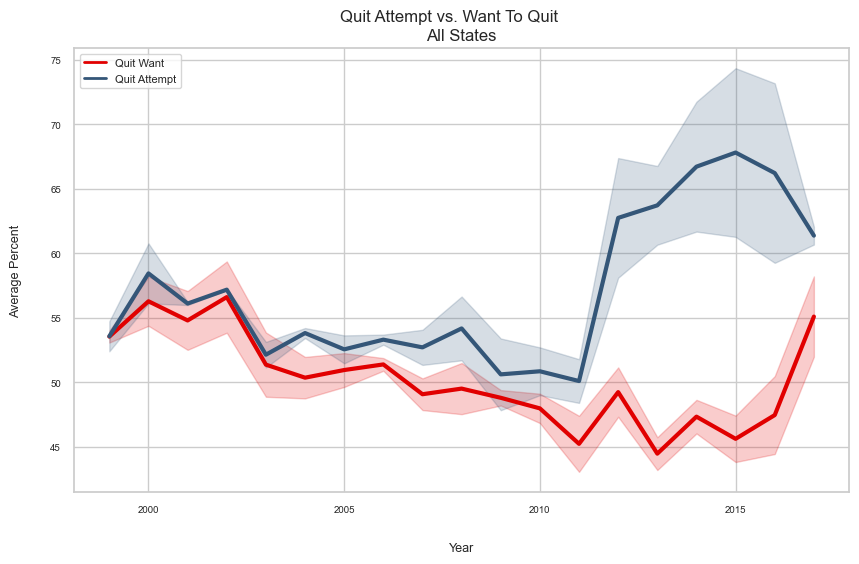

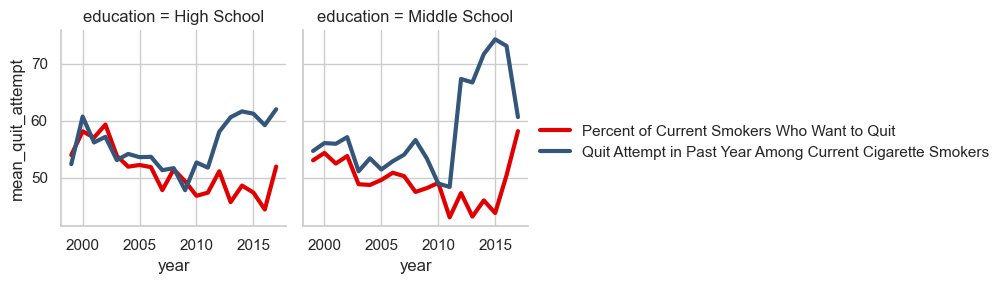

In [23]:
yts_quit_tried= (df.loc[
                 (df['edu_id'].isin(['1EDU', '2EDU'])) & 
                 (df['measureid'].isin(['170CES', '169QUA'])) & 
                 (df['gender_id'] == '1GEN')]
                 .groupby(['measuredesc', 'year', 'education'], as_index=False)
                 .agg(mean_quit_attempt=('data_value', 'mean'))
                )

plt.figure(figsize=(10, 6))
sns.lineplot(data= yts_quit_tried, x='year', y='mean_quit_attempt', hue='measuredesc', linewidth=3, palette=["#e10000", "#345678"])
legend_handles = [Line2D([0], [0], color="#e10000", lw=2, label='Quit Want'),
                  Line2D([0], [0], color="#345678", lw=2, label='Quit Attempt')] 
plt.legend(handles=legend_handles, title='', fontsize=8)
plt.title('All States', fontsize=12)
plt.suptitle('Quit Attempt vs. Want To Quit',fontsize=12, y= 0.915,)
plt.xlabel('Year', fontsize=9, labelpad=20)
plt.ylabel('Average Percent', fontsize=9, labelpad=20)
plt.xticks(np.arange(2000,2018,5),fontsize=7)
plt.yticks(fontsize=7)
plt.subplots_adjust(top=0.85)
g = sns.FacetGrid(yts_quit_tried, col='education', col_wrap=2)
g.map(sns.lineplot, 'year', 'mean_quit_attempt', 'measuredesc', linewidth=3, 
      palette={"Percent of Current Smokers Who Want to Quit": "#e10000", "Quit Attempt in Past Year Among Current Cigarette Smokers": "#345678"})
g.add_legend()
plt.show()


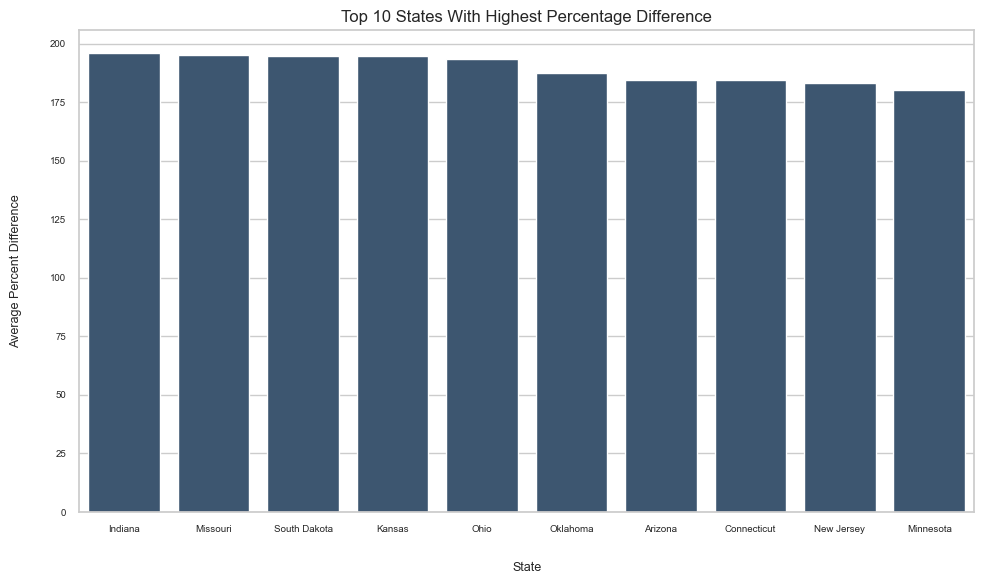

In [24]:
 filtered_df=(df.loc[(df["edu_id"].isin(["2EDU", "1EDU"])) & 
                    (df["measureid"] == "166SSA") & 
                    (df["response"] == "Frequent") & 
                    (df["gender_id"] == "1GEN") & 
                    (df["locationdesc"] != "guam")]
    .groupby(["locationdesc", "year"])
    .agg(sum_smoke_pct=("data_value", "sum"))
    .reset_index()
    .sort_values(by=["locationdesc", "year"])
)
difference = (
    filtered_df.assign(
        change=lambda filtered_df: (
            (filtered_df.groupby("locationdesc")["sum_smoke_pct"].transform("max") - 
             filtered_df.groupby("locationdesc")["sum_smoke_pct"].transform("min")) /
            ((filtered_df.groupby("locationdesc")["sum_smoke_pct"].transform("max") + 
              filtered_df.groupby("locationdesc")["sum_smoke_pct"].transform("min")) / 2) * 100
        )
    )
    .loc[:, ["locationdesc", "year", "sum_smoke_pct", "change"]]  
    .drop_duplicates(subset=["locationdesc", "change"])  
    .sort_values(by="change", ascending=False)  
    .nlargest(10, "change") 
    .reset_index(drop=True) 
)
plt.figure(figsize=(10, 6))
sns.barplot(x='locationdesc', y='change', data=difference, color="#345678")
plt.title("Top 10 States With Highest Percentage Difference", fontsize=12)
plt.xlabel("State", fontsize=9, labelpad=20)
plt.ylabel("Average Percent Difference", fontsize=9, labelpad=20)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()


In [25]:
 model_smoke=(df.loc[(df["edu_id"].isin(["2EDU", "1EDU"])) & 
                    (df["measureid"] == "166SSA") & 
                    (df["response"] == "Frequent") & 
                    (df["gender_id"] == "1GEN") & 
                    (df["locationdesc"] != "guam")]
    .groupby(["locationdesc", "year"])
    .agg(sum_smoke_pct=("data_value", "sum"))
    .reset_index()
    .sort_values(by=["locationdesc", "year"])
)
print(model_smoke)
print(filtered_tax)
new_model_smoke = model_smoke.merge(filtered_tax[['year', 'locationdesc','455CGS']], on=['year','locationdesc'],how='inner')
print(new_model_smoke)

    locationdesc  year  sum_smoke_pct
0        Alabama  2000           17.0
1        Alabama  2002           15.7
2        Alabama  2004           12.9
3        Alabama  2006           15.6
4        Alabama  2008           12.3
..           ...   ...            ...
259    Wisconsin  2008            9.9
260    Wisconsin  2010            7.4
261    Wisconsin  2012            5.2
262    Wisconsin  2016            2.8
263      Wyoming  2000            5.1

[264 rows x 3 columns]
     locationdesc  year  451CGS  455CGS
0         Alabama  1970    0.12    0.43
1         Alabama  1971    0.12    0.42
2         Alabama  1972    0.12    0.42
3         Alabama  1973    0.12    0.43
4         Alabama  1974    0.12    0.47
...           ...   ...     ...     ...
2545      Wyoming  2015    0.60    5.17
2546      Wyoming  2016    0.60    5.26
2547      Wyoming  2017    0.60    5.33
2548      Wyoming  2018    0.60    5.46
2549      Wyoming  2019    0.60    5.68

[2550 rows x 4 columns]
    locationdes

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
Y=new_model_smoke['sum_smoke_pct']

X=new_model_smoke['455CGS']
X=X.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X

array([[2.88],
       [3.28],
       [3.57],
       [3.54],
       [3.75],
       [4.73],
       [4.84],
       [5.1 ],
       [5.41],
       [3.46],
       [4.03],
       [4.16],
       [5.2 ],
       [6.27],
       [6.49],
       [6.62],
       [6.92],
       [7.1 ],
       [2.94],
       [3.53],
       [3.82],
       [5.45],
       [3.66],
       [3.95],
       [2.93],
       [3.19],
       [4.32],
       [4.73],
       [5.36],
       [7.47],
       [8.01],
       [8.21],
       [8.6 ],
       [9.25],
       [2.89],
       [3.23],
       [3.41],
       [4.22],
       [5.58],
       [5.83],
       [5.82],
       [5.99],
       [3.55],
       [3.32],
       [3.39],
       [2.57],
       [3.07],
       [3.48],
       [4.53],
       [4.64],
       [4.56],
       [4.82],
       [5.  ],
       [4.05],
       [4.72],
       [4.98],
       [7.45],
       [8.79],
       [8.7 ],
       [8.94],
       [9.09],
       [3.05],
       [3.65],
       [4.04],
       [4.61],
       [4.82],
       [5.

In [28]:
Y

0      17.0
1      15.7
2      12.9
3      15.6
4      12.3
       ... 
256     9.9
257     7.4
258     5.2
259     2.8
260     5.1
Name: sum_smoke_pct, Length: 261, dtype: float64

In [29]:
X_train

array([[4.64],
       [4.72],
       [5.15],
       [5.13],
       [3.53],
       [3.45],
       [3.2 ],
       [3.09],
       [7.05],
       [5.52],
       [5.26],
       [4.73],
       [4.53],
       [4.09],
       [4.88],
       [4.84],
       [4.63],
       [2.89],
       [4.1 ],
       [3.31],
       [3.76],
       [3.45],
       [6.25],
       [5.45],
       [4.61],
       [4.01],
       [9.25],
       [3.6 ],
       [3.45],
       [3.23],
       [7.58],
       [7.47],
       [3.75],
       [4.39],
       [5.  ],
       [4.53],
       [4.43],
       [2.93],
       [4.82],
       [6.31],
       [5.82],
       [5.88],
       [4.97],
       [5.03],
       [2.88],
       [3.05],
       [2.59],
       [5.33],
       [5.5 ],
       [5.58],
       [3.23],
       [4.3 ],
       [5.64],
       [4.16],
       [3.9 ],
       [8.21],
       [2.71],
       [3.57],
       [3.82],
       [3.29],
       [4.54],
       [5.84],
       [3.54],
       [3.16],
       [6.49],
       [4.75],
       [3.

In [30]:
Y_train

49      7.5
54      0.9
73      8.1
127     3.2
176    14.8
       ... 
123     7.5
171     7.0
97      5.0
257     7.4
59      2.3
Name: sum_smoke_pct, Length: 208, dtype: float64

In [31]:
X_test

array([[4.9 ],
       [3.1 ],
       [3.7 ],
       [4.82],
       [4.73],
       [5.23],
       [4.04],
       [5.68],
       [3.18],
       [2.98],
       [4.83],
       [3.49],
       [6.92],
       [4.04],
       [4.88],
       [3.19],
       [6.27],
       [5.88],
       [2.7 ],
       [3.76],
       [4.  ],
       [3.19],
       [3.87],
       [7.32],
       [3.97],
       [4.32],
       [3.98],
       [3.54],
       [4.48],
       [3.66],
       [3.2 ],
       [4.51],
       [3.53],
       [3.98],
       [7.45],
       [4.58],
       [3.54],
       [2.57],
       [3.04],
       [2.94],
       [7.1 ],
       [5.62],
       [4.24],
       [2.76],
       [5.36],
       [2.57],
       [4.39],
       [7.38],
       [8.79],
       [5.58],
       [3.48],
       [3.53],
       [3.4 ]])

In [32]:
Y_test

249     6.6
139    13.2
234     3.8
51      3.1
27      8.2
145     3.7
133    11.0
166    13.4
232     2.4
88     24.7
248    10.6
71     13.9
16      0.5
63     13.5
217     6.0
25     14.8
13      0.3
151     7.2
69     19.3
254    11.6
196    11.7
131    14.8
209    15.6
159     3.5
215    11.6
26     11.7
203    13.3
224     1.4
187    10.8
22      8.4
202    18.7
241     0.6
148    13.2
165    16.4
56      4.2
92     15.4
178    11.5
167    18.7
221    15.3
18     26.4
17      0.3
155     8.0
150     8.1
242    29.5
28      8.2
45      3.9
225     0.9
162     2.7
57      3.6
75      0.2
223    13.8
100     4.4
153    16.0
Name: sum_smoke_pct, dtype: float64

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=10),
    "Decision Tree": DecisionTreeRegressor(random_state=10),
}
results=[]
for name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(Y_test,y_pred)
    mse=mean_squared_error(Y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(Y_test,y_pred)
    results.append({"mae":mae,"mse":mse,"rmse":rmse,"r2":r2})
results

[{'mae': 4.589536069114532,
  'mse': 33.41431388570662,
  'rmse': 5.780511559170747,
  'r2': 0.2940600037443989},
 {'mae': 4.522549573225518,
  'mse': 37.005488738635975,
  'rmse': 6.083213685103949,
  'r2': 0.21818970543746286},
 {'mae': 4.783490566037735,
  'mse': 42.681851415094336,
  'rmse': 6.533134884195667,
  'r2': 0.09826590690396764}]

In [34]:
pred_model=LinearRegression()
pred_model.fit(X_train,Y_train)
y_preds=pred_model.predict(X_test)
results = pd.DataFrame({
    'Y test': Y_test.reset_index(drop=True),
    'Y predicted': pd.Series(y_preds)
})
print(results)
Y_test=Y_test.reset_index(drop=True)
pd.DataFrame({'y':Y_test, 'y_preds':y_preds})

    Y test  Y predicted
0      6.6     7.438103
1     13.2    11.349321
2      3.8    10.045581
3      3.1     7.611935
4      8.2     7.807495
5      3.7     6.721046
6     11.0     9.306796
7     13.4     5.743241
8      2.4    11.175489
9     24.7    11.610069
10    10.6     7.590206
11    13.9    10.501890
12     0.5     3.048847
13    13.5     9.306796
14     6.0     7.481561
15    14.8    11.153760
16     0.3     4.461231
17     7.2     5.308662
18    19.3    12.218480
19    11.6     9.915208
20    11.7     9.393712
21    14.8    11.153760
22    15.6     9.676189
23     3.5     2.179687
24    11.6     9.458899
25    11.7     8.698384
26    13.3     9.437170
27     1.4    10.393245
28    10.8     8.350720
29     8.4    10.132497
30    18.7    11.132031
31     0.6     8.285533
32    13.2    10.414974
33    16.4     9.437170
34     4.2     1.897210
35    15.4     8.133430
36    11.5    10.393245
37    18.7    12.500957
38    15.3    11.479695
39    26.4    11.696985
40     0.3     2

,y,y_preds
0,6.6,7.438103
1,13.2,11.349321
2,3.8,10.045581
3,3.1,7.611935
4,8.2,7.807495
5,3.7,6.721046
6,11.0,9.306796
7,13.4,5.743241
8,2.4,11.175489
9,24.7,11.610069


In [35]:
import statsmodels.api as sm


In [36]:
Y=selected_yts['avg_Pct_value']

X=selected_price['avg_Cost_value']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:          avg_Pct_value   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.15e-08
Time:                        04:24:06   Log-Likelihood:                -21.694
No. Observations:                  19   AIC:                             47.39
Df Residuals:                      17   BIC:                             49.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.9945      0.754     15.